# Assignement

**Features**:

The data science skills can help you predict the price of a used car based on a given set of features discussed below.

Size of training set: 6,019 records

Size of test set: 1,234 records

FEATURES:

Name: The brand and model of the car.

Location: The location in which the car is being sold or is available for purchase.

Year: The year or edition of the model.

Kilometers_Driven: The total kilometres driven in the car by the previous owner(s) in KM.

Fuel_Type: The type of fuel used by the car.

Transmission: The type of transmission used by the car.

Owner_Type: Whether the ownership is Firsthand, Second hand or other.

Mileage: The standard mileage offered by the car company in kmpl or km/kg

Engine: The displacement volume of the engine in cc.

Power: The maximum power of the engine in bhp.

Seats: The number of seats in the car.

New_Price: The price of a new car of the same model.

Price: The price of the used car in INR Lakhs.

### Importing Python libraries and Data set

In [1]:
#Importing numerical libraries
import numpy as np 

#Importing dataframe libraries pandas 
import pandas as pd

#Importing ploting libraries for plot
import matplotlib.pyplot as plt   

#Importing seaborn for statistical plots
import seaborn as sns

#Importing seaborn for statistical libraries
import scipy.stats as st
import statsmodels.formula.api as smf

#To enable plotting graphs in Jupyter notebook
%matplotlib inline 

#To Remove warnings in jupyter notebook
import warnings
warnings.filterwarnings('ignore')

#Importing accuracy measures and confusion matrix
from sklearn import metrics
import statsmodels.formula.api as smf
from sklearn.metrics import roc_curve, auc

#Importing sklearn package's splitting data for train and test data
from sklearn.model_selection import train_test_split

In [2]:
#Reading the CSV file into pandas dataframe
train = pd.read_csv("Data_train#.csv")  
test = pd.read_csv("Data_test#.csv")  

### Information About Dataset

In [3]:
#checking the top 5 details of Datasets
print("\n\nTop 5 rows of the datasets :-")
train.head()



Top 5 rows of the datasets :-


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
#checking the bottom 5 details of Datasets
print("\n\nBottom 5 details of the datasets :-")
train.tail()



Bottom 5 details of the datasets :-


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65
6018,Chevrolet Beat Diesel,Hyderabad,2011,47000,Diesel,Manual,First,25.44 kmpl,936 CC,57.6 bhp,5.0,NaN,2.50


In [5]:
#checking the columns in the Datasets
print("\n\nColumns in the datasets :-")
print("\nData Set : \n",'\n', list(train.columns))



Columns in the datasets :-

Data Set : 
 
 ['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'New_Price', 'Price']


In [6]:
#checking the data types of features
print("\n\nDatatypes of features in the datasets :-")
print("\nData Set : \n",'\n',train.dtypes)



Datatypes of features in the datasets :-

Data Set : 
 
 Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object


In [7]:
#checking the number of rows
print("\n\nNumber of observations in the datasets :-")
print("\nData Set : \n",len(train))

#checking the number of columns
print("\n\nNumber of features in the dataset :-")
print("\nData Set : ", len(train.columns))


#checking the shape of dataset
print("\n\nShape of the dataset :-")
print("\nData Set : \n",train.shape)




Number of observations in the datasets :-

Data Set : 
 6019


Number of features in the dataset :-

Data Set :  13


Shape of the dataset :-

Data Set : 
 (6019, 13)


In [8]:
#checking for NaNs or empty cells by features
print("\n\nNumber of empty cells or Nans value in the datasets :-")
print("\nData Set :- \n",'\n',train.isnull().sum())



Number of empty cells or Nans value in the datasets :-

Data Set :- 
 
 Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64


### Data Cleaning Process

*Creating two feature columns of numeric type and catagerical type to calculate missing value & Unique values*

In [10]:
#Creating numeric feature type column

numeric_features = train.select_dtypes(include=[np.number])

numeric_features.columns

Index(['Year', 'Kilometers_Driven', 'Seats', 'Price'], dtype='object')

In [11]:
#Calculating total missing values percentage

total = numeric_features.isnull().sum().sort_values(ascending=False)
percent = ((numeric_features.isnull().sum()/numeric_features.isnull().count()).sort_values(ascending=False)*100)
missing_data = pd.concat([total, percent], axis=1,join='outer', keys=['Total Missing Count', '% of Total Observations'])
missing_data.index.name =' Numeric Feature'

missing_data.head(20)

,Total Missing Count,% of Total Observations
Numeric Feature,,
Seats,42,0.006978
Price,0,0.000000
Kilometers_Driven,0,0.000000
Year,0,0.000000


In [13]:
#Creating categorical feature type column

categorical_features = train.select_dtypes(include=[np.object])

categorical_features.columns


Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power', 'New_Price'],
      dtype='object')

In [14]:
#Calculating total missing values percentage

total = categorical_features.isnull().sum().sort_values(ascending=False)
percent = ((categorical_features.isnull().sum()/categorical_features.isnull().count()).sort_values(ascending=False)*100)
missing_data = pd.concat([total, percent], axis=1,join='outer', keys=['Total Missing Count', ' % of Total Observations'])
missing_data.index.name ='Feature'
missing_data.head(20)

,Total Missing Count,% of Total Observations
Feature,,
New_Price,5195,0.863100
Power,36,0.005981
Engine,36,0.005981
Mileage,2,0.000332
Owner_Type,0,0.000000
Transmission,0,0.000000
Fuel_Type,0,0.000000
Location,0,0.000000
Name,0,0.000000


## Data Processing

### Data Cleaning of Power

In [16]:
#Removing the texts and converting to integer

a=[]
for i in train['Power']:
    a.append(str(i).split(' ')[0])

In [17]:
train['Power']=a

In [18]:
#Replacing null value of columns

train['Power']=train['Power'].replace('null',np.nan)

In [19]:
#Filing null value with median 

train['Power']=train['Power'].fillna(train['Power'].median())

In [20]:
train['Power'].isnull().sum()

0

In [21]:
#Convert to float data type

train['Power']=train['Power'].astype('float64')

In [22]:
z=[]
for i in test['Power']:
    z.append(str(i).split(' ')[0])

In [23]:
test['Power']=z

In [24]:
test['Power']=test['Power'].replace('null',np.nan)

In [25]:
test['Power']=test['Power'].fillna(test['Power'].median())

In [26]:
test['Power'].isnull().sum()

0

In [27]:
test['Power']=test['Power'].astype('float64')

### Data cleaning of Engine

In [28]:
train['Engine']=train['Engine'].replace('null',np.nan)

In [29]:
train['Engine'].isnull().sum()

36

In [30]:
train['Engine'] = train['Engine'].fillna(train['Engine'].mode()[0])

In [31]:
train['Engine'] = train.Engine.str.replace('CC', '').astype(float)

In [32]:
test['Engine']=test['Engine'].replace('null',np.nan)

In [33]:
test['Engine'].isnull().sum()

10

In [34]:
test['Engine'] = test['Engine'].fillna(test['Engine'].mode()[0])

In [35]:
test['Engine'] = test.Engine.str.replace('CC', '').astype(float)

### Data cleaning of Seat Colmun

In [36]:
train.Seats.isnull().sum()

42

In [37]:
train.Seats.value_counts()

5.0     5014
7.0      674
8.0      134
4.0       99
6.0       31
2.0       16
10.0       5
9.0        3
0.0        1
Name: Seats, dtype: int64

In [38]:
train.Seats.unique()

array([ 5.,  7.,  8.,  4.,  6.,  2., nan, 10.,  9.,  0.])

In [39]:
train.Seats.describe()

count    5977.000000
mean        5.278735
std         0.808840
min         0.000000
25%         5.000000
50%         5.000000
75%         5.000000
max        10.000000
Name: Seats, dtype: float64

In [40]:
train['Seats']=train['Seats'].fillna(train['Seats'].mode()[0])

In [41]:
test['Seats']=test['Seats'].fillna(test['Seats'].mode()[0])

### Data cleaning of Mileage Colmun

In [42]:
train.Mileage.isnull().sum()

2

In [43]:
f=[]
for i in train['Mileage']:
    f.append (str(i).split(' ')[0])

In [44]:
train['Mileage']=f

In [45]:
train['Mileage'] = train.Mileage.astype(float)

In [46]:
train['Mileage'] = train['Mileage'].fillna(train['Mileage'].median())

In [47]:
e=[]
for i in test['Mileage']:
    e.append (str(i).split(' ')[0])

In [48]:
test['Mileage']=e

In [49]:
test['Mileage'] = test.Mileage.astype(float)

In [50]:
test['Mileage'] = test['Mileage'].fillna(test['Mileage'].median())

## Feature Engineering

**Performing feature engineering base on the column information given in dataset**

***Creating two feature columns Brand and Model extracting from Name column***

In [51]:
names = list(train.Name)
brand = []
model = []
for i in range(len(names)):
   try:
       brand.append(names[i].split(" ")[0].strip())
       try:
           model.append(" ".join(names[i].split(" ")[1:]).strip())
       except:
           pass
   except:
       print("ERR ! - ", names[i], "@" , i)
train["Brand"] =  brand
train["Model"] = model
train.drop(labels = ['Name'], axis = 1, inplace = True)


In [52]:
names = list(test.Name)
brand = []
model = []
for i in range(len(names)):
   try:
       brand.append(names[i].split(" ")[0].strip())
       try:
           model.append(" ".join(names[i].split(" ")[1:]).strip())
       except:
           pass
   except:
       print("ERR ! - ", names[i], "@" , i)
test["Brand"] =  brand
test["Model"] = model
test.drop(labels = ['Name'], axis = 1, inplace = True)


In [53]:
#Drop New_Price column as it contains more then 85% null values 

train.drop(labels = ['New_Price'], axis = 1, inplace = True)
test.drop(labels = ['New_Price'], axis = 1, inplace = True)

### Re-ordering Data-set

In [54]:
train= train[['Brand', 'Model', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
      'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']]
test= test[['Brand', 'Model', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
      'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats']]

In [55]:
train.head()

,Brand,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai,Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda,Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti,Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi,A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [56]:
test.head()

,Brand,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti,Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26,998.0,58.20,4.0
1,Maruti,Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796.0,47.30,5.0
2,Toyota,Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393.0,147.80,7.0
3,Toyota,Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364.0,93.70,5.0
4,Hyundai,i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197.0,82.85,5.0


In [57]:
train.isnull().sum()

Brand                 0
Model                 0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine                0
Power                36
Seats                 0
Price                 0
dtype: int64

In [58]:
test.isnull().sum()

Brand                 0
Model                 0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine                0
Power                10
Seats                 0
dtype: int64

In [59]:
train.Brand.value_counts()

Maruti           1211
Hyundai          1107
Honda             608
Toyota            411
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
BMW               267
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               60
Jaguar             40
Fiat               28
Mitsubishi         27
Mini               26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Lamborghini         1
Isuzu               1
Bentley             1
Smart               1
Ambassador          1
Name: Brand, dtype: int64

In [60]:
train.Location.value_counts()

Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64

In [61]:
train.Fuel_Type.value_counts()

Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

In [62]:
train.Transmission.value_counts()

Manual       4299
Automatic    1720
Name: Transmission, dtype: int64

In [63]:
train.Owner_Type.value_counts()

First             4929
Second             968
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64

In [64]:
train.Seats.value_counts()

5.0     5056
7.0      674
8.0      134
4.0       99
6.0       31
2.0       16
10.0       5
9.0        3
0.0        1
Name: Seats, dtype: int64

train.head()

***Creating  feature column Age of car extracting information from year column***

In [66]:
df1 = train.copy() 
df1['Age_of_car'] = '2019'
df1['Age_of_car'] = pd.to_datetime(df1['Age_of_car'],format='%Y')
df1['Year'] = pd.to_datetime(df1['Year'],format='%Y')
df1['Age_of_car'] = ((df1['Age_of_car'] - df1['Year']).dt.days/365)
train['Age_of_car'] = df1['Age_of_car']

df2 = test.copy() 
df2['Age_of_car'] = '2019'
df2['Age_of_car'] = pd.to_datetime(df2['Age_of_car'],format='%Y')
df2['Year'] = pd.to_datetime(df2['Year'],format='%Y')
df2['Age_of_car'] = ((df2['Age_of_car'] - df2['Year']).dt.days/365)
test['Age_of_car'] = df2['Age_of_car']


***Creating feature column Market share extracting infromation of car sell in India from Online source***

In [67]:
market = {'Maruti' : 45.5,
'Hyundai'  :    11.5,
'Honda' :     4.5,
'Toyota'    :  3.5,
'Mercedes-Benz' :  2.4,
'Volkswagen':   3.6,
'Ford'    :   2.5,
'Mahindra' : 5.5,
'BMW'   :      1.6,
'Audi'    :  2,
'Tata'  :      5.5,
'Skoda'       : 2,
'Renault'  :   1.8,
'Chevrolet' :   1.5,
'Nissan':   1,
'Land'    : 1,
'Jaguar'      :1,
'Fiat'  :    0.6,
'Mitsubishi'  : 0.5,
'Mini':      0.5,
'Volvo'    :   0.5,
'Porsche' :  0.2,
'Jeep'  :    0.3,
'Datsun' :  0.3,
'Force'  :      0.1,
'ISUZU'  :    0.1,
'Smart'  :      0.1,
'Lamborghini'  :  0.1,
'Ambassador'  :   0.1,
'Isuzu' :  0.1,
'Bentley': 0.1
}
train['Market_Share'] = train['Brand'].map(market)
train['Market_Share']=train['Market_Share'].replace('null',np.nan)
train['Market_Share']=train['Market_Share'].fillna(train['Market_Share'].median())


test['Market_Share'] = test['Brand'].map(market)
test['Market_Share']=test['Market_Share'].replace('null',np.nan)
test['Market_Share']=test['Market_Share'].fillna(test['Market_Share'].median())

***Categorizing car power to generalized information of the power column***

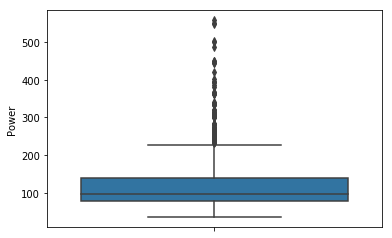

In [68]:
sns.boxplot( y=train["Power"] )
plt.show()

In [69]:
train.Power.describe()

count    5983.000000
mean      112.974899
std        53.430733
min        34.200000
25%        77.000000
50%        97.700000
75%       138.100000
max       560.000000
Name: Power, dtype: float64

In [70]:
def get_power(Power):

    
    if (Power >=250  and Power < 600):
        return 'High Power'
    elif (Power >= 100 and Power < 250):
        return 'Medium Power'
    elif (Power >= 0 and Power < 100):
        return 'Low Power'
    
train['Car_Power'] = train['Power'].apply(get_power)
train['Car_Power']=train['Car_Power'].replace('null',np.nan)
train['Car_Power']=train['Car_Power'].fillna(train['Car_Power'].mode()[0])


test['Car_Power'] = test['Power'].apply(get_power) 
test['Car_Power']=test['Car_Power'].replace('null',np.nan)
test['Car_Power']=test['Car_Power'].fillna(test['Car_Power'].mode()[0])


***Categorizing car Engine to generalized information of the Engine column***

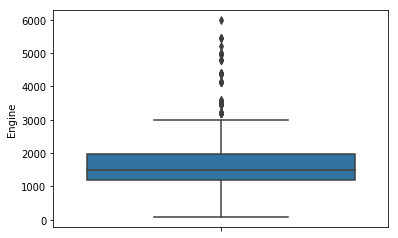

In [71]:
sns.boxplot( y=train["Engine"] )
plt.show()

In [72]:
train.Engine.describe()

count    6019.000000
mean     1618.738827
std       600.445858
min        72.000000
25%      1197.000000
50%      1493.000000
75%      1969.000000
max      5998.000000
Name: Engine, dtype: float64

In [73]:
def get_engine(Engine):

    
    if (Engine >=3000  and Engine < 6000):
        return 'High Engine'
    elif (Engine >= 1500 and Engine < 3000):
        return 'Medium Engine'
    elif (Engine >= 0 and Engine < 1500):
        return 'Low Engine'
    
train['Car_Engine'] = train['Engine'].apply(get_engine)   
test['Car_Engine'] = test['Engine'].apply(get_engine) 

***Categorizing Mileage to generalized information of the car performance***

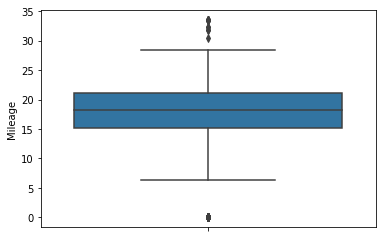

In [74]:
sns.boxplot( y=train["Mileage"] )
plt.show()

In [75]:
train.Mileage.describe()

count    6019.000000
mean       18.134966
std         4.581528
min         0.000000
25%        15.170000
50%        18.150000
75%        21.100000
max        33.540000
Name: Mileage, dtype: float64

In [76]:
def get_mileage(Mileage):

    
    if (Mileage >=24  and Mileage < 40):
        return 'Best Mileage'
    elif (Mileage >= 12 and Mileage < 24):
        return 'Economy Mileage'
    elif (Mileage >= 0 and Mileage < 12):
        return 'Least Mileage'
    
train['Car_Mileage'] = train['Mileage'].apply(get_mileage)   
test['Car_Mileage'] = test['Mileage'].apply(get_mileage) 

***Categorizing kilometer driven to generalized information of the car performance***

In [77]:
def get_Kilometers(Kilometers_Driven):

    
    if (Kilometers_Driven >=300000  and Kilometers_Driven < 800000):
        return 'High Driven'
    elif (Kilometers_Driven >= 100000 and Kilometers_Driven < 300000):
        return 'Medium Driven'
    elif (Kilometers_Driven >= 40000 and Kilometers_Driven < 100000):
        return 'Minimum Driven'
    elif (Kilometers_Driven >= 1 and Kilometers_Driven < 40000):
        return 'Least Driven'
    
train['Car_Driven'] = train['Kilometers_Driven'].apply(get_Kilometers)
train['Car_Driven']=train['Car_Driven'].replace('null',np.nan)
train['Car_Driven']=train['Car_Driven'].fillna(train['Car_Driven'].mode()[0])


test['Car_Driven'] = test['Kilometers_Driven'].apply(get_Kilometers) 
test['Car_Driven']=test['Car_Driven'].replace('null',np.nan)
test['Car_Driven']=test['Car_Driven'].fillna(test['Car_Driven'].mode()[0])


## Exploratory Data Analysis

In [78]:
#checking the information of data features
print("\n\nInformation of data features in the datasets :- \n")
print(train.info())



Information of data features in the datasets :- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 19 columns):
Brand                6019 non-null object
Model                6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6019 non-null float64
Engine               6019 non-null float64
Power                5983 non-null float64
Seats                6019 non-null float64
Price                6019 non-null float64
Age_of_car           6019 non-null float64
Market_Share         6019 non-null float64
Car_Power            6019 non-null object
Car_Engine           6019 non-null object
Car_Mileage          6019 non-null object
Car_Driven           6019 non-null object
dtypes: float64(7), int64(2), object(1

In [79]:
#checking for null values
print("\n\nNumber of Null value in the datasets :-")

print("\nData Set :- \n",'\n', train.isnull().sum())



Number of Null value in the datasets :-

Data Set :- 
 
 Brand                 0
Model                 0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine                0
Power                36
Seats                 0
Price                 0
Age_of_car            0
Market_Share          0
Car_Power             0
Car_Engine            0
Car_Mileage           0
Car_Driven            0
dtype: int64


In [80]:
#checking the information of data features
print("\n\nInformation of data features in the datasets :- \n")
print(test.info())



Information of data features in the datasets :- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 18 columns):
Brand                1234 non-null object
Model                1234 non-null object
Location             1234 non-null object
Year                 1234 non-null int64
Kilometers_Driven    1234 non-null int64
Fuel_Type            1234 non-null object
Transmission         1234 non-null object
Owner_Type           1234 non-null object
Mileage              1234 non-null float64
Engine               1234 non-null float64
Power                1224 non-null float64
Seats                1234 non-null float64
Age_of_car           1234 non-null float64
Market_Share         1234 non-null float64
Car_Power            1234 non-null object
Car_Engine           1234 non-null object
Car_Mileage          1234 non-null object
Car_Driven           1234 non-null object
dtypes: float64(6), int64(2), object(10)
memory usage: 173.6+ KB
None


In [81]:
#checking for null values
print("\n\nNumber of Null value in the datasets :-")

print("\nData Set :- \n",'\n', test.isnull().sum())



Number of Null value in the datasets :-

Data Set :- 
 
 Brand                 0
Model                 0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine                0
Power                10
Seats                 0
Age_of_car            0
Market_Share          0
Car_Power             0
Car_Engine            0
Car_Mileage           0
Car_Driven            0
dtype: int64


In [82]:
#Cheking Unique values in features
for i in train.columns:
    print("Unique values in", i, train[i].nunique())

Unique values in Brand 31
Unique values in Model 1876
Unique values in Location 11
Unique values in Year 22
Unique values in Kilometers_Driven 3093
Unique values in Fuel_Type 5
Unique values in Transmission 2
Unique values in Owner_Type 4
Unique values in Mileage 430
Unique values in Engine 146
Unique values in Power 369
Unique values in Seats 9
Unique values in Price 1373
Unique values in Age_of_car 22
Unique values in Market_Share 18
Unique values in Car_Power 3
Unique values in Car_Engine 3
Unique values in Car_Mileage 3
Unique values in Car_Driven 4


In [83]:
#Cheking Unique values in features
for i in test.columns:
    print("Unique values in", i, test[i].nunique())

Unique values in Brand 29
Unique values in Model 768
Unique values in Location 11
Unique values in Year 20
Unique values in Kilometers_Driven 755
Unique values in Fuel_Type 4
Unique values in Transmission 2
Unique values in Owner_Type 4
Unique values in Mileage 298
Unique values in Engine 104
Unique values in Power 247
Unique values in Seats 7
Unique values in Age_of_car 20
Unique values in Market_Share 18
Unique values in Car_Power 3
Unique values in Car_Engine 3
Unique values in Car_Mileage 3
Unique values in Car_Driven 4


In [84]:
#Cheking statistical details like count, percentile, mean, std of numeric values of dataset 

train.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,6019.0,2013.358199,3.269742,1998.00,2011.00000,2014.00000,2016.000000,2.019000e+03
Kilometers_Driven,6019.0,58738.380296,91268.843206,171.00,34000.00000,53000.00000,73000.000000,6.500000e+06
Mileage,6019.0,18.134966,4.581528,0.00,15.17000,18.15000,21.100000,3.354000e+01
Engine,6019.0,1618.738827,600.445858,72.00,1197.00000,1493.00000,1969.000000,5.998000e+03
Power,5983.0,112.974899,53.430733,34.20,77.00000,97.70000,138.100000,5.600000e+02
Seats,6019.0,5.276790,0.806346,0.00,5.00000,5.00000,5.000000,1.000000e+01
Price,6019.0,9.479468,11.187917,0.44,3.50000,5.64000,9.950000,1.600000e+02
Age_of_car,6019.0,5.645324,3.272016,0.00,3.00274,5.00274,8.005479,2.101370e+01
Market_Share,6019.0,13.144576,16.587313,0.10,2.40000,4.50000,11.500000,4.550000e+01


In [85]:
#Checking pairwise correlation of dataset

train.corr()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Age_of_car,Market_Share
Year,1.000000,-0.173048,0.321534,-0.046288,0.022237,0.015204,0.305327,-1.000000,0.017665
Kilometers_Driven,-0.173048,1.000000,-0.065253,0.090476,0.032271,0.082782,-0.011493,0.173046,-0.035435
Mileage,0.321534,-0.065253,1.000000,-0.581303,-0.507953,-0.299632,-0.306588,-0.321528,0.395125
Engine,-0.046288,0.090476,-0.581303,1.000000,0.860372,0.393849,0.657196,0.046285,-0.461557
Power,0.022237,0.032271,-0.507953,0.860372,1.000000,0.101942,0.770918,-0.022242,-0.425109
Seats,0.015204,0.082782,-0.299632,0.393849,0.101942,1.000000,0.052811,-0.015204,-0.092643
Price,0.305327,-0.011493,-0.306588,0.657196,0.770918,0.052811,1.000000,-0.305331,-0.287794
Age_of_car,-1.000000,0.173046,-0.321528,0.046285,-0.022242,-0.015204,-0.305331,1.000000,-0.017660
Market_Share,0.017665,-0.035435,0.395125,-0.461557,-0.425109,-0.092643,-0.287794,-0.017660,1.000000


## Univariate , Bivariate and Multivariate Analysis

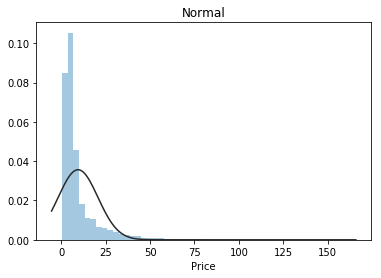

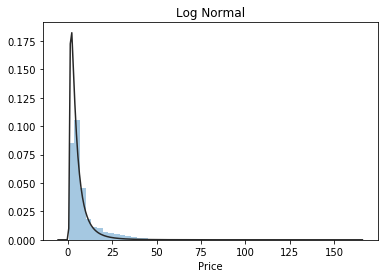

In [86]:
#Cheking distribution of dataset with target verible.

#Normal distribution
y = train['Price']
plt.figure(1); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)

#Log transform distribution
plt.figure(2); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

**It is Observe that Price doesn't follow normal distribution, so before performing machine learning algorithm it has to be transformed. While log transformation does pretty good job.**


## Heat Map

*Heat map is the most widely used summarization visualization,it shows the correlation plot. In which measures the correlation between every pair of values in a dataset and plots a result in color.*

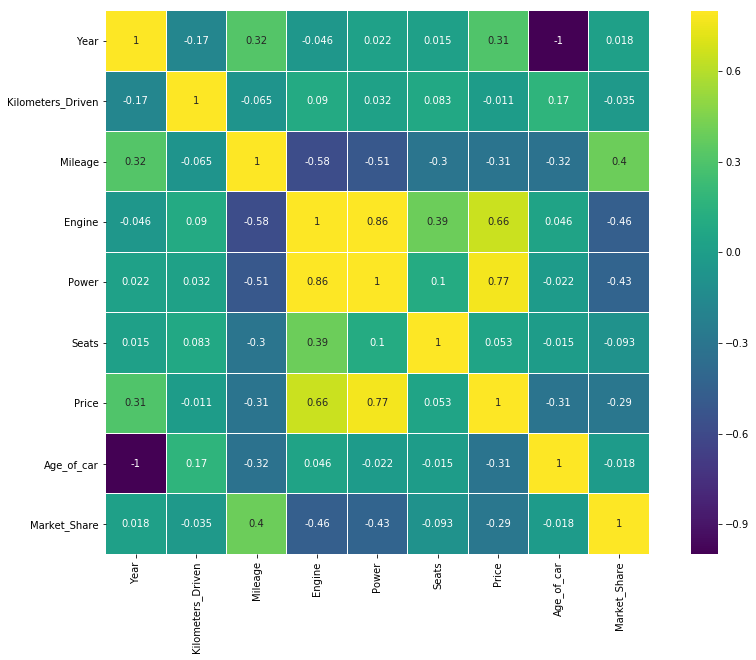

In [87]:
#Cheking correlation by using Heat Map
plt.figure(figsize=(15,10))
sns.heatmap(train.corr(), vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white")

**• Each cell in this plot is the intersection of two variables. Its color and label together indicate the amount of correlation between the two variables.** 

**Observation :-**

**• Engine and Power are highly correlated with each other and Price is highly correlated with Power and Engine.** 

**• Kilometers_Driven-Engine and kilometers_Driven-Price are very uncorrelated.**  

**• Seat and Age of car are slightly correlated.**

## Pair Plot

*Pair plot gives us a reasonable overview insight about the correlated features in the form of pair plot & scatter pair plot.*

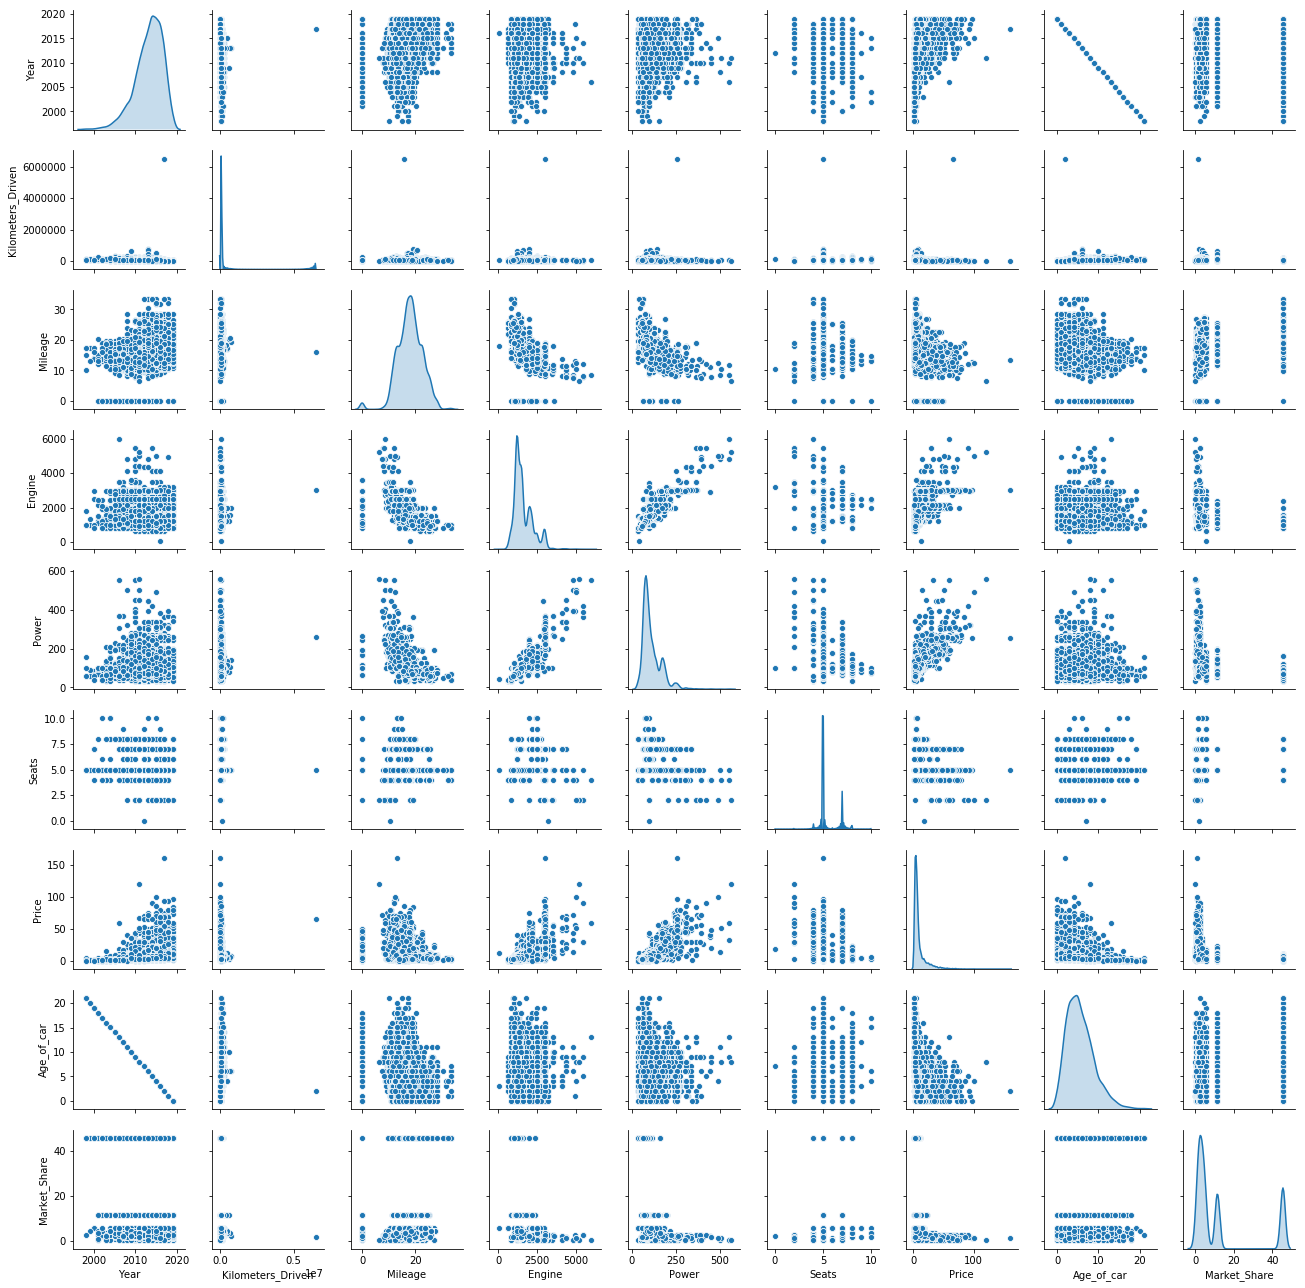

In [88]:
sns.pairplot(train,size = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

**Observation :-**

**• Observation between Price and Power, in plot the value almost appears to be a exponential increase with respect to each-other.**

**• Observation between Engine and Power, interesting value plot found with one verible to other, as it plot clearly says the performance of this values effect on its.**

**• Observation between Age_of_car and Price, in plot can see the dots drawing a verticel and horizontal line which acts as the boundry for the price with respective to the years.**

### Car Engine type with respective price

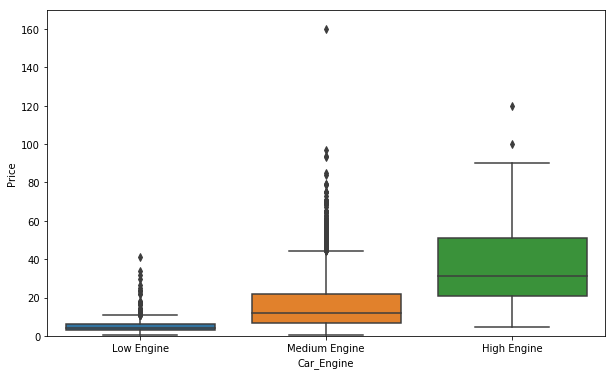

In [90]:
var = 'Car_Engine'
data = pd.concat([train['Price'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 6))
fig = sns.boxplot(x=var, y="Price", data=data)
fig.axis(ymin=0, ymax=170);

### Car Engine type with Mileage performance

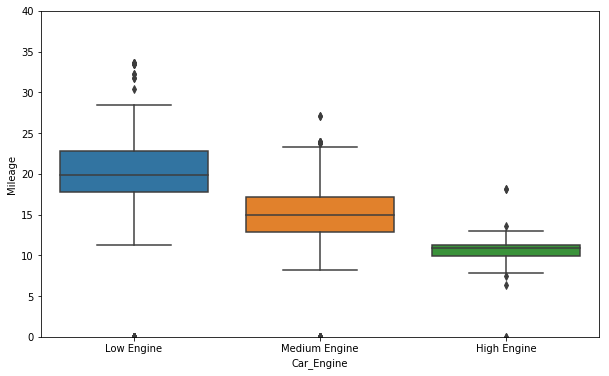

In [91]:
var = 'Car_Engine'
data = pd.concat([train['Mileage'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 6))
fig = sns.boxplot(x=var, y="Mileage", data=data)
fig.axis(ymin=0, ymax=40);

### Distribution of car engine and fule type

In [92]:
pd.crosstab(train.Car_Engine, train.Fuel_Type)

Fuel_Type,CNG,Diesel,Electric,LPG,Petrol
Car_Engine,,,,,
High Engine,0,30,0,0,31
Low Engine,52,1431,1,10,2146
Medium Engine,4,1744,1,0,569


### Distribution of car mileage and location of drive 

In [93]:
pd.crosstab(train.Car_Mileage,train.Location)

Location,Ahmedabad,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune
Car_Mileage,,,,,,,,,,,
Best Mileage,37,15,50,47,62,88,60,81,69,47,66
Economy Mileage,175,298,402,552,446,605,335,539,444,672,517
Least Mileage,12,45,42,37,46,49,18,31,22,71,39


### Top car brand

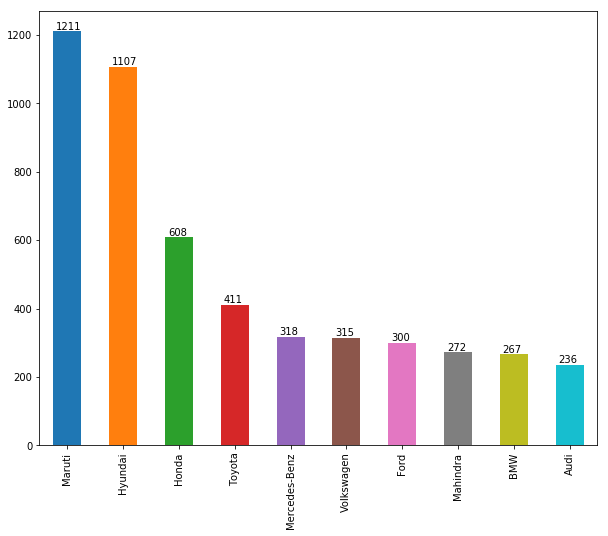

In [94]:
plt.figure(figsize=(10,8))
ax=train['Brand'].value_counts().head(10).plot.bar()
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.05, p.get_height()+5),fontsize=10)
plt.show()

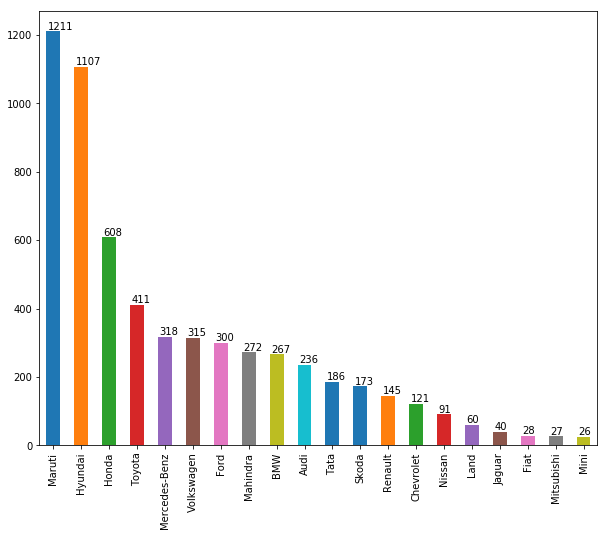

In [96]:
plt.figure(figsize=(10,8))
ax = train['Brand'].value_counts().head(20).plot.bar()
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.05, p.get_height()+5),fontsize=10)
plt.show()

### Top 10 location of car

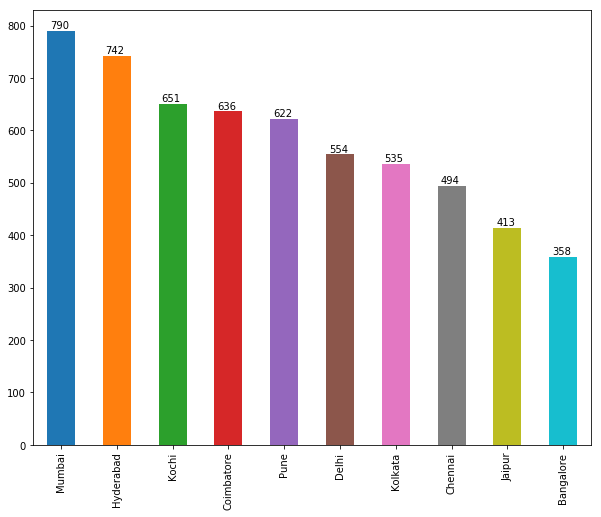

In [95]:
plt.figure(figsize=(10,8))
ax = train['Location'].value_counts().head(10).plot.bar()
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.05, p.get_height()+5),fontsize=10)
plt.show()

### Distribution of car seating

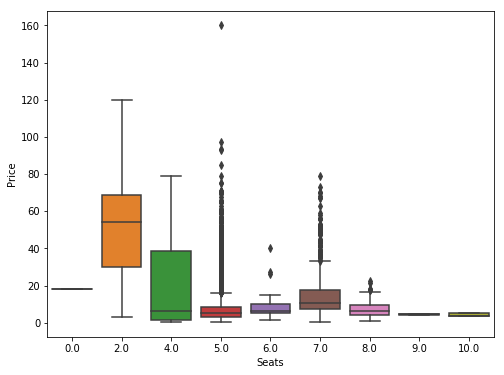

In [97]:
plt.figure(figsize=(8,6))
sns.boxplot(x=train['Seats'], y=train['Price'])
plt.show()

### Distribution of car mileage with respect to location

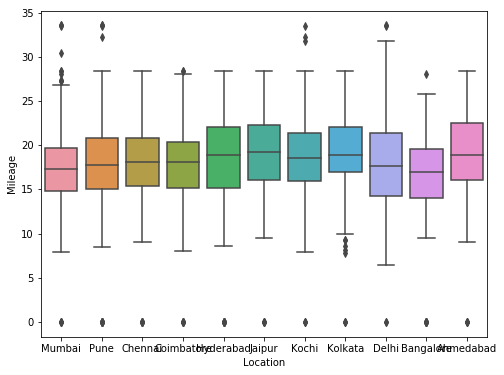

In [98]:
plt.figure(figsize=(8,6))
sns.boxplot(x=train['Location'], y=train['Mileage'])
plt.show()

### Distribution of fuel_type

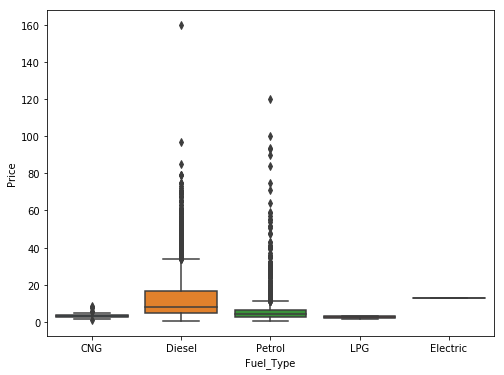

In [99]:
plt.figure(figsize=(8,6))
sns.boxplot(x=train['Fuel_Type'], y=train['Price'])
plt.show()

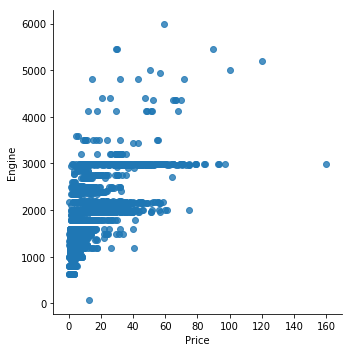

In [101]:
sns.lmplot(y='Engine',x="Price",data=train,fit_reg=False)
plt.show()

### Fuel type uses 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000028977841828>],
      dtype=object)

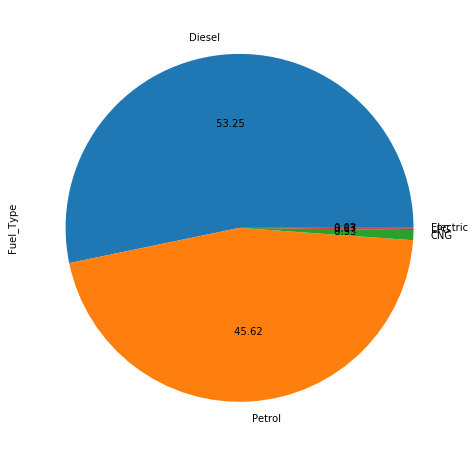

In [103]:
train['Fuel_Type'].value_counts().plot.pie(subplots=True, figsize=(8,8), autopct=' %.2f')

### Location wise uses of cars

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000289778C46D8>],
      dtype=object)

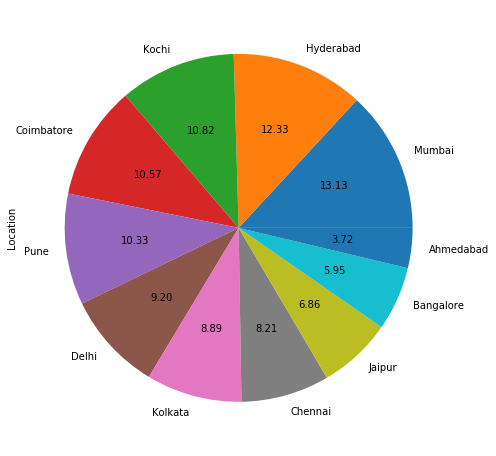

In [104]:
train['Location'].value_counts().plot.pie(subplots=True, figsize=(8, 8), autopct='%.2f')

## Machine Learning Model

***Creating dummies for categarical variable***

In [105]:
training_set = pd.get_dummies(train, columns=['Brand', 'Model', 'Location', 'Fuel_Type', 'Transmission',
      'Owner_Type','Car_Mileage','Car_Engine','Car_Power', 'Seats','Car_Driven','Year'],drop_first=True)
test_set = pd.get_dummies(test, columns=['Brand', 'Model', 'Location', 'Fuel_Type', 'Transmission',
      'Owner_Type','Car_Mileage','Car_Engine','Car_Power', 'Seats','Car_Driven','Year'],drop_first=True)

In [108]:
X = training_set.drop(labels=['Price'], axis=1)
y = training_set['Price'].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 2)

In [109]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((4213, 1967), (4213,), (1806, 1967), (1806,))

***Applying Feature Scaling Method***

In [110]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [111]:
from math import sqrt 
from sklearn.metrics import mean_squared_log_error

***Lightgbm Algorithm***

In [114]:
import lightgbm as lgb
train_data = lgb.Dataset(x_train, label=y_train)
test_data = lgb.Dataset(x_test, label=y_test)



param = {'objective':'regression','num_leaves':80,
                              'learning_rate':0.1, 'n_estimators':1200,
                              'max_bin' : 30, 'bagging_fraction' : 0.8,
                              'bagging_freq' : 9, 'feature_fraction' :0.129,
                              'feature_fraction_seed':9, 'bagging_seed':9,
                              'min_data_in_leaf' :3, 'min_sum_hessian_in_leaf' : 6, 'random_state':10}
lgbm = lgb.train(params=param,
                 verbose_eval=1000,
                 train_set=train_data,
                 valid_sets=[test_data])

y_pred2 = lgbm.predict(x_test)
print('RMSLE:', sqrt(mean_squared_log_error(np.exp(y_test), np.exp(y_pred2))))

[1000]	valid_0's l2: 15.4854
RMSLE: 3.931370146179506


***Xgboost Algorithm***

In [115]:
from xgboost import XGBRegressor
xgb = XGBRegressor(learning_rate =0.1, 
      n_estimators=1500, max_depth=12, min_child_weight=1,gamma=0, reg_alpha=2e-5,
      subsample=0.8,colsample_bytree=0.8,
      nthread=4,scale_pos_weight=1,seed=27,verbose=True,random_state=10)
xgb.fit(x_train, y_train)
xgb.fit(x_train, y_train)
y_pred1 = xgb.predict(x_test)
print('RMSLE:', sqrt(mean_squared_log_error(np.exp(y_test), np.exp(y_pred1))))

RMSLE: 4.1173044413483355


***Ensembling Model***

In [118]:
y_pred = y_pred1*0.80 + y_pred2*0.20 
print('RMSLE:', sqrt(mean_squared_log_error(np.exp(y_test), np.exp(y_pred))))

RMSLE: 4.007362587147761


### Testing Model

***Copying the missing columns which created by the dummies***

In [119]:
missing_cols_test = []
for col in training_set.columns:
    if col not in test_set.columns:
        missing_cols_test.append(col)
        
for i in missing_cols_test:
    test_set[i] = 0

test_set.drop('Price', axis=1, inplace=True)

In [120]:
missing_cols_test = []
for col in test_set.columns:
    if col not in training_set.columns:
        missing_cols_test.append(col)
        
for i in missing_cols_test:
    training_set[i] = 0

In [121]:
training_set = training_set.reindex(sorted(training_set.columns), axis=1)
test_set = test_set.reindex(sorted(test_set.columns), axis=1)

***Defining x_train, y_train and y_test***

In [122]:
X_train = training_set.drop(labels='Price', axis=1)
y_train = training_set['Price'].values

X_test = test_set

In [123]:
X_train.shape, X_test.shape

((6019, 2133), (1234, 2133))

In [124]:
from xgboost import XGBRegressor
xgb=XGBRegressor(learning_rate =0.1, 
      n_estimators=1500, max_depth=12, min_child_weight=1,gamma=0, reg_alpha=2e-5,
      subsample=0.8,colsample_bytree=0.8,
      nthread=4,scale_pos_weight=1,seed=27,verbose=True,random_state=10)
xgb.fit(X_train, y_train)
y_pred1 = xgb.predict(X_test)

In [125]:
import lightgbm as lgb
train_data = lgb.Dataset(X_train, label=y_train)

param = {'objective':'regression','num_leaves':80,
                              'learning_rate':0.1, 'n_estimators':1200,
                              'max_bin' : 30, 'bagging_fraction' : 0.8,
                              'bagging_freq' : 9, 'feature_fraction' :0.129,
                              'feature_fraction_seed':9, 'bagging_seed':9,
                              'min_data_in_leaf' :3, 'min_sum_hessian_in_leaf' : 6, 'random_state':10}

lgbm = lgb.train(params=param,
                 train_set=train_data)

y_pred2 = lgbm.predict(X_test)

In [126]:
y_pred = y_pred1*0.80 + y_pred2*0.20

***Predecting Results***

In [127]:
y_pred

array([ 2.65967973,  3.2131687 , 17.33257364, ...,  2.77174462,
        4.77013722, 20.19052795])

***Saving the predictions to an excel sheet***

In [ ]:
pd.DataFrame(y_pred, columns = ['Price']).to_excel("Car_Price.xlsx")